# 读取数据

In [1]:
import pandas as pd  
%matplotlib inline
path = r'D:\Documents\python_documents\Practical Business Data Analysis\case\CH7\data.csv'
data = pd.read_csv(path)  
data.head()

,Time,VStatus,HGB,Platelet,Age,LogWBC,LogPBM,Protein,SCalc
0,4.0,0,10.2,1,59,4.0453,0.7782,12,10
1,4.0,0,10.0,1,49,3.9590,1.6232,0,13
2,7.0,0,12.4,1,48,3.7993,1.8573,0,10
3,7.0,0,10.2,1,81,3.5911,1.8808,0,11
4,8.0,0,9.9,1,57,3.8325,1.6532,0,8


(0, 1)

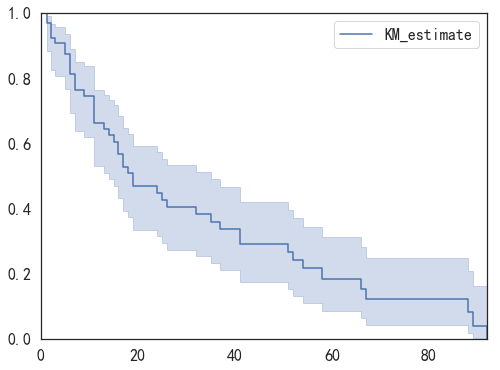

In [16]:
from lifelines import KaplanMeierFitter
T = data.Time
E = data.VStatus
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)`b`
plt.rcParams['figure.figsize'] = (8.0, 6.0)   #调整图片大小
kmf.plot()
plt.xticks(fontsize=16)    #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)    #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=16)    #设置legend刻度值的字体大小
plt.ylim(0, 1)

# 描述性分析

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
Time        65 non-null float64
VStatus     65 non-null int64
HGB         65 non-null float64
Platelet    65 non-null int64
Age         65 non-null int64
LogWBC      65 non-null float64
LogPBM      65 non-null float64
Protein     65 non-null int64
SCalc       65 non-null int64
dtypes: float64(4), int64(5)
memory usage: 4.6 KB


## 以中位数为界，分析血色素含量（HGB）对生存函数的影响

In [7]:
data.describe()

,Time,VStatus,HGB,Platelet,Age,LogWBC,LogPBM,Protein,SCalc
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,24.007692,0.738462,10.201538,0.861538,60.153846,3.769014,1.549660,3.615385,10.123077
std,23.694383,0.442893,2.557556,0.348072,10.333850,0.238013,0.364206,6.012207,1.815796
min,1.250000,0.000000,4.900000,0.000000,38.000000,3.361700,0.477100,0.000000,7.000000
25%,7.000000,0.000000,8.800000,1.000000,51.000000,3.643500,1.361700,0.000000,9.000000
50%,15.000000,1.000000,10.200000,1.000000,60.000000,3.732400,1.623200,1.000000,10.000000
75%,35.000000,1.000000,12.000000,1.000000,67.000000,3.875100,1.845100,4.000000,10.000000
max,92.000000,1.000000,14.600000,1.000000,82.000000,4.954200,2.000000,27.000000,18.000000


### 以血色素含量（HGB）的平均水平（以中位数计）将样本分成两组

In [6]:
data.HGB.median()

10.2

Text(0.5, 1.0, '生存曲线图')

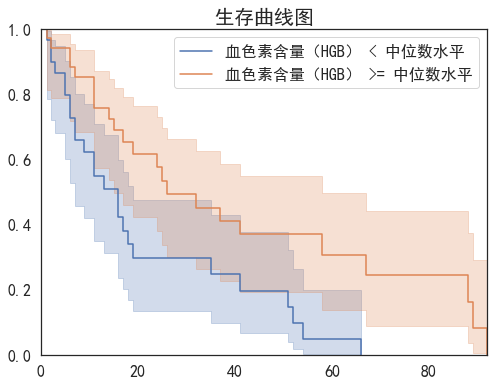

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (8.0, 6.0)   #调整图片大小
ax = plt.subplot(111)

HGB_median = data.HGB.median()
hgb_med = (data["HGB"] < HGB_median)

kmf.fit(T[hgb_med], event_observed=E[hgb_med], label="血色素含量（HGB） < 中位数水平 ")
kmf.plot(ax=ax)
kmf.fit(T[~hgb_med], event_observed=E[~hgb_med], label="血色素含量（HGB） >= 中位数水平")
kmf.plot(ax=ax)

plt.xticks(fontsize=16)    #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)    #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=16)    #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title('生存曲线图', fontsize=20)

## 分析血小板水平对生存曲线的影响

In [10]:
data.Platelet.value_counts()

1    56
0     9
Name: Platelet, dtype: int64

(0, 1)

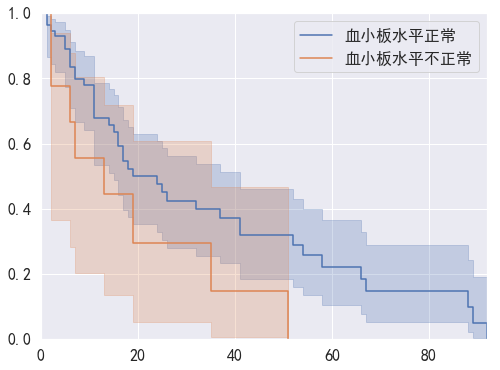

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (8.0, 6.0)          #调整图片大小
ax = plt.subplot(111)

Platelet_N = (data["Platelet"] == 1)

kmf.fit(T[Platelet_N], event_observed=E[Platelet_N], label="血小板水平正常")
kmf.plot(ax=ax)
kmf.fit(T[~Platelet_N], event_observed=E[~Platelet_N], label="血小板水平不正常")
kmf.plot(ax=ax)

plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=16)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)

## 分析年龄对生存函数的影响

In [12]:
data.Age.median()

60.0

(0, 1)

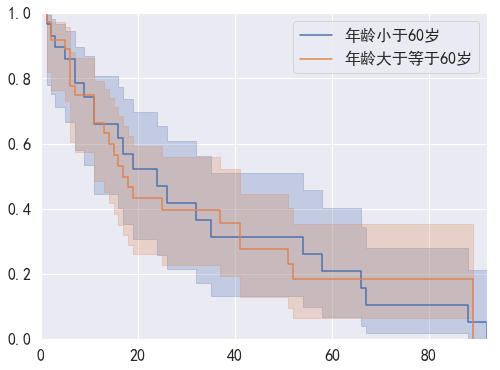

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (8.0, 6.0)          #调整图片大小
ax = plt.subplot(111)

Age_med = (data["Age"] < 60)

kmf.fit(T[Age_med], event_observed=E[Age_med], label="年龄小于60岁")
kmf.plot(ax=ax)
kmf.fit(T[~Age_med], event_observed=E[~Age_med], label="年龄大于等于60岁")
kmf.plot(ax=ax)

plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=16)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)

## 分析其他变量对生存函数的影响

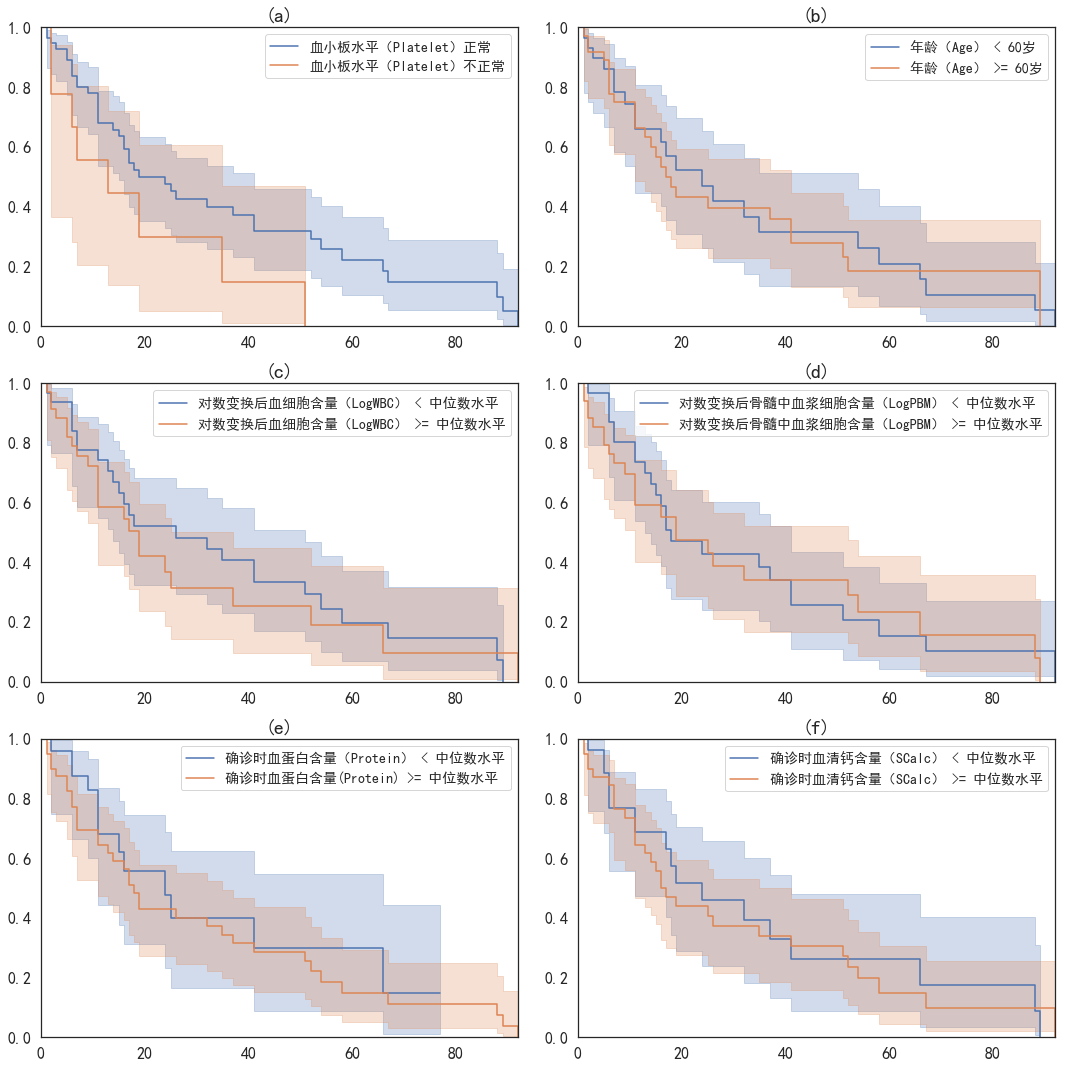

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                            #设置seaborn默认格式
    
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name(), style="white")       #seaborn解决中文乱码的问题
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (15, 15)             #设定图片大小
# f = plt.figure()                                  #确定画布
ax = plt.subplot(321)
Platelet_N = (data["Platelet"] == 1)
kmf.fit(T[Platelet_N], event_observed=E[Platelet_N], label="血小板水平（Platelet）正常")
kmf.plot(ax=ax)
kmf.fit(T[~Platelet_N], event_observed=E[~Platelet_N], label="血小板水平（Platelet）不正常")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(a)", fontsize=20)                        #设置子图标题

ax = plt.subplot(322)
Age_med = (data["Age"] < 60)
kmf.fit(T[Age_med], event_observed=E[Age_med], label="年龄（Age） < 60岁")
kmf.plot(ax=ax)
kmf.fit(T[~Age_med], event_observed=E[~Age_med], label="年龄（Age） >= 60岁")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(b)", fontsize=20)                        #设置子图标题

ax = plt.subplot(323)
LogWBC_med = (data["LogWBC"] < data.LogWBC.median())
kmf.fit(T[LogWBC_med], event_observed=E[LogWBC_med], label="对数变换后血细胞含量（LogWBC） < 中位数水平")
kmf.plot(ax=ax)
kmf.fit(T[~LogWBC_med], event_observed=E[~LogWBC_med], label="对数变换后血细胞含量（LogWBC） >= 中位数水平")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(c)", fontsize=20)                        #设置子图标题

ax = plt.subplot(324)
LogPBM_med = (data["LogPBM"] < data.LogPBM.median())

kmf.fit(T[LogPBM_med], event_observed=E[LogPBM_med], label="对数变换后骨髓中血浆细胞含量（LogPBM） < 中位数水平")
kmf.plot(ax=ax)
kmf.fit(T[~LogPBM_med], event_observed=E[~LogPBM_med], label="对数变换后骨髓中血浆细胞含量（LogPBM） >= 中位数水平")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(d)", fontsize=20)                        #设置子图标题

ax = plt.subplot(325)
Protein_med = (data["Protein"] < data.Protein.median())

kmf.fit(T[Protein_med], event_observed=E[Protein_med], label="确诊时血蛋白含量（Protein） < 中位数水平")
kmf.plot(ax=ax)
kmf.fit(T[~Protein_med], event_observed=E[~Protein_med], label="确诊时血蛋白含量(Protein) >= 中位数水平")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(e)", fontsize=20)                        #设置子图标题

ax = plt.subplot(326)
SCalc_med = (data['SCalc'] < data.SCalc.median())

kmf.fit(T[SCalc_med], event_observed=E[SCalc_med], label="确诊时血清钙含量（SCalc） < 中位数水平")
kmf.plot(ax=ax)
kmf.fit(T[~SCalc_med], event_observed=E[~SCalc_med], label="确诊时血清钙含量（SCalc） >= 中位数水平")
kmf.plot(ax=ax)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('')
plt.legend(fontsize=14)                            #设置legend刻度值的字体大小
plt.ylim(0, 1)
plt.title("(f)", fontsize=20)                        #设置子图标题

plt.tight_layout()
plt.savefig('生存分析：6幅箱线图.png',dpi=500)      #保存png格式图片
plt.show()

# 加速死亡模型

In [12]:
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()
aft.fit(data, duration_col='Time', event_col='VStatus')
aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 65 observations, 17 censored>
         event col = 'VStatus'
number of subjects = 65
  number of events = 48
    log-likelihood = -209.958
  time fit was run = 2019-07-20 06:31:18 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
lambda_ HGB         0.124     1.132     0.067          -0.007           0.256               0.993               1.291
        Platelet    0.340     1.405     0.470          -0.580           1.260               0.560               3.526
        Age         0.003     1.003     0.017          -0.031           0.036               0.969               1.037
        LogWBC     -1.134     0.322     0.660          -2.428           0.160               0.088               1.173
        LogPBM     -0.235     0.791     0.415          -1.049           0.579               0.350               1.785
        Protein    -0.011     0.989     0.024          -0.057 

## AIC变量选择 

In [2]:
%load_ext rpy2.ipython
%matplotlib inline

In [3]:
print(123);

123


In [24]:
%%R -i data
library(survival)
fit=survreg(formula = Surv(Time,VStatus)~HGB+Platelet+Age+LogWBC+LogPBM+Protein+SCalc,
dist='exponential', data=data)								#拟合加速死亡模型，设置残差项为指数分布
#al = summary(fit)										#显示模型fit的各方面细节，包括估计值、标准差等
fit.aic = step(fit, trace=F)
x_aic = summary(fit.aic)

In [25]:
%R -o x_aic
x_aic

R object with classes: ('summary.survreg',) mapped to:
<ListVector - Python:0x00000249C4550248 / R:0x00000249CC074848>
[Vector, IntVector, FloatVector, IntVector, ..., StrVector, IntVector, FloatVector, BoolVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('survreg',) mapped to:
<Vector - Python:0x00000249C31914C8 / R:0x00000249C876C2E8>
[RObject, Formula, RObject, StrVector]
  df: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000249C42A5B48 / R:0x00000249C96EC428>
[4]
  loglik: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000249CC77AF48 / R:0x00000249CBF79580>
[-215.114906, -210.839712]
  iter: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000249CC745888 / R:0x00000249C96EC690>
[4]
...
  scale: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000249C4590A48 / R:0x00000249C9A19B18>
['Exponential distribution']
  coefficients: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000249C45901C8 / R:0x00000249C9A1A2C0>
[65]
  var: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000249C4590F48 / R:0x00000249C9A2AE20>
[8.550388]
  table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x00000249C4590048 / R:0x00000249BE883DD8>
[       0]

In [26]:
%%R -i data
library(survival)
fit=survreg(formula = Surv(Time,VStatus)~HGB+Platelet+Age+LogWBC+LogPBM+Protein+SCalc,
dist='exponential', data=data)								#拟合加速死亡模型，设置残差项为指数分布
#al = summary(fit)										#显示模型fit的各方面细节，包括估计值、标准差等
fit.aic = step(fit, trace=F)
x_aic_coef = summary(fit.aic)$Coef[,1]

D:\Anaconda\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [27]:
%R -o x_aic_coef
x_aic_coef

AttributeError: 'rpy2.rinterface.RNULLType' object has no attribute '__rname__'

## 用rpy2进行AIC特征提取，一来输出的结果不完整，二来报错多。下面用R来运行。

# Cox风险模型

In [30]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data, duration_col='Time', event_col='VStatus', show_progress=True)

cph.print_summary()     # access the results using cph.summary

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -149.38651, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 65 observations, 17 censored>
      duration col = 'Time'
         event col = 'VStatus'
number of subjects = 65
  number of events = 48
partial log-likelihood = -149.39
  time fit was run = 2019-07-19 11:46:45 UTC

---
          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
HGB      -0.14      0.87      0.07           -0.29            0.00                0.75                1.00
Platelet -0.29      0.75      0.51           -1.29            0.71                0.27                2.03
Age      -0.00      1.00      0.02           -0.04            0.03                0.96                1.03
LogWBC    0.99      2.68      0.80           -0.59            2.56                0.56               12.89
LogPBM    0.22      1.24      0.45        

## Cox模型AIC变量选择

In [32]:
X = data.drop(['Time', 'VStatus'], axis=1) 
X.columns

Index(['HGB', 'Platelet', 'Age', 'LogWBC', 'LogPBM', 'Protein', 'SCalc'], dtype='object')

In [35]:
import itertools
from lifelines import CoxPHFitter

predictorcols = list(X.columns)   #将各个自变量汇成一个列表
AICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列。
        df_x = X[list(variables)]
        df_y = data[['Time', 'VStatus']]
        data_new = pd.concat([df_y ,df_x],axis=1,join_axes=[df_x.index])
        cph = CoxPHFitter()
        res = cph.fit(data_new, duration_col='Time', event_col='VStatus', show_progress=True)
        AICs[variables] = res.aic

from collections import Counter
c = Counter(AICs)   #AICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-4:-1]  #出现次数最少的10个元素，对应这里aic最小的3个值。接着倒序排列。

Iteration 3: norm_delta = 0.00005, step_size = 0.9500, ll = -151.71083, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 3 iterations.


AttributeError: 'CoxPHFitter' object has no attribute 'aic'

## 无法进行Cox的AIC模型选择，下面不得不用R进行变量选择